# Bagging - QRT ENS Data Challenge


## Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


## Loading data


In [3]:
#load dataset. In this case the final dataset was used.

X_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('x_test.csv')

In [ ]:
X_train.head()

,ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,...,DE_WIND_EXCESS,FR_WIND_EXCESS,FR_OVERCON,DE_NUCLEAR_CLUSTER,DE_NUCLEAR_0,DE_NUCLEAR_1,DE_NUCLEAR_2,DE_NUCLEAR_3,DE_NUCLEAR_4,DE_NUCLEAR_5
0,1054,0.210099,-0.427458,-0.074847,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,...,-0.424541,-1.081876,-2.063908,3,0.0,0.0,0.0,1.0,0.0,0.0
1,2049,-0.022399,-1.003452,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,...,-0.802641,-0.491355,0.609125,2,0.0,0.0,1.0,0.0,0.0,0.0
2,1924,1.395035,1.978665,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,...,-0.289006,-0.357727,-1.384961,2,0.0,0.0,1.0,0.0,0.0,0.0
3,297,-0.983324,-0.849198,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,...,-0.173801,-0.380780,-0.250896,1,0.0,1.0,0.0,0.0,0.0,0.0
4,1101,0.143807,-0.617038,-0.036917,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,...,-0.026802,-0.213282,-3.943384,1,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


## Bagging Regressor and train score

In [9]:
# Create a decision tree regressor
y_train_clean = y_train['TARGET']
dt = DecisionTreeRegressor()

# Create a bagging regressor using the decision tree as the base estimator
bagging_lr = BaggingRegressor(base_estimator=dt, n_estimators=10, random_state=42)

# Fit the bagging regressor on the data
bagging_lr.fit(X_train, y_train_clean)

# Predict on the training set
output_train_bagging = bagging_lr.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [7]:
def metric_train(output):
    # calculate MSE
    mse = mean_squared_error(y_train_clean, output)
    # calculate MAE
    mae = mean_absolute_error(y_train_clean, output)
    # calculate Spearman correlation
    print('Mean Squared Error (MSE) for the train set using bagging: {:.5f}'.format(mse))
    print('Mean Absolute Error (MAE) for the train set using bagging:{:.5f}'.format(mae))
    print('Spearman correlation for the train set using bagging: {:.1f}%'.format(100 * spearmanr(output, y_train_clean).correlation))
    return spearmanr(output, y_train_clean).correlation

In [8]:
# Calculate and print the Spearman correlation for the train set
sprmanr = metric_train(output_train_bagging)

Mean Squared Error (MSE) for the train set using bagging: 0.22561
Mean Absolute Error (MAE) for the train set using bagging:0.27139
Spearman correlation for the train set using bagging: 82.4%


The Spearman correlation obtained with our model on the train data set is about 82.4%.
Mean Squared Error (MSE) for the train set using bagging is 0.22561.
Mean Absolute Error (MAE) for the train set using bagging is 0.27139.

## Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
# Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
bagging_lr = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'base_estimator__max_depth': [3, 4, 5],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.6, 0.7],
}

# Define the custom scoring function using Spearman correlation
def custom_spearman_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    spearman_corr, _ = spearmanr(predictions, y)
    return spearman_corr

# Create the GridSearchCV object with the custom scoring function
grid_search = GridSearchCV(bagging_lr, param_grid, cv=5, scoring=custom_spearman_scorer)

# Fit the GridSearchCV object on the data
grid_search.fit(X_train, y_train_clean)

# Get the best estimator from the grid search
best_bagging_lr = grid_search.best_estimator_

# Predict on the training set using the best model
output_train_best_bagging = best_bagging_lr.predict(X_train)

# Print the best parameters and the Spearman correlation for the train set
print('Best Parameters:', grid_search.best_params_)
print('Spearman correlation for the train set using the best model: {:.1f}%'.format(100 * metric_train(output_train_best_bagging)))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': 5, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 200}
Mean Squared Error (MSE) for the train set using bagging: 0.82616
Mean Absolute Error (MAE) for the train set using bagging:0.52647
Spearman correlation for the train set using bagging: 40.3%
Spearman correlation for the train set using the best model: 40.3%


After tuning our best set of parameters is base_estimator__max_depth': 6, 'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 100}
Spearman correlation for the train set using the best model is 43.0%.
Mean Squared Error (MSE) is 0.82616 and Mean Absolute Error (MAE) is 0.52647.

In [ ]:
y_test_submission = X_test[['ID']].copy()
y_test_submission['TARGET'] = best_bagging_lr.predict(X_test)

y_test_submission.to_csv('bagging_tuned_finaldata.csv', index=False)

After submitting the csv file on Challenge, we obtained a public score around 14.39% which is not an improvement from the performance using unmodified data.

## Observe Feature Importance

For this data we use permutation importance instead of feature_importance_. This is because feature_importance_ has a tendency to inflate the importance of continuous features.

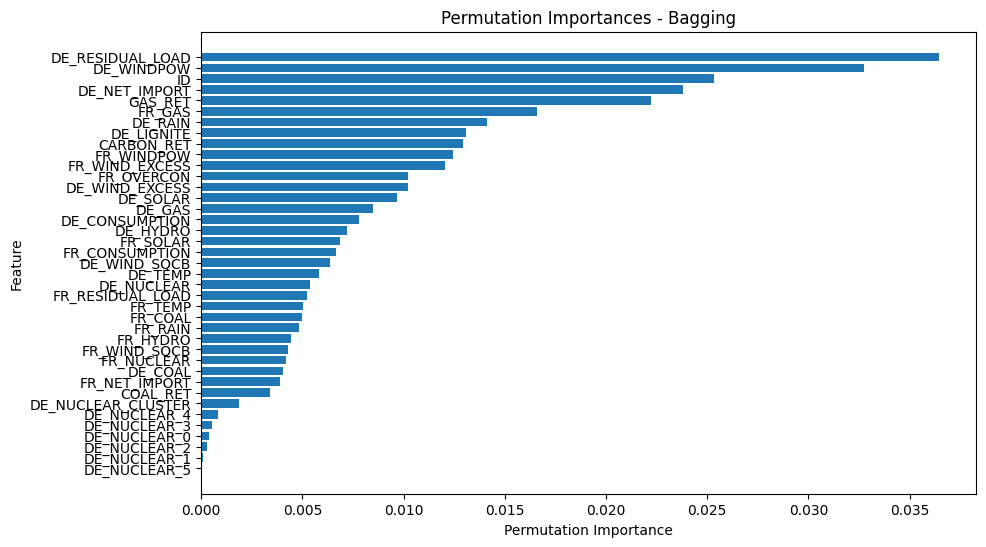

In [17]:
from sklearn.inspection import permutation_importance
# Access all base estimators in the bagging ensemble
base_estimators = best_bagging_lr.estimators_

# Calculate permutation importances
result_bagging = permutation_importance(best_bagging_lr, X_train, y_train_clean, n_repeats=30, random_state=42)

# Sort features based on importance
sorted_idx_bagging = result_bagging.importances_mean.argsort()
features_sorted_bagging = X_train.columns[sorted_idx_bagging]
importance_sorted_bagging = result_bagging.importances_mean[sorted_idx_bagging]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(features_sorted_bagging)), importance_sorted_bagging, align="center")
plt.yticks(range(len(features_sorted_bagging)), features_sorted_bagging)
plt.ylabel("Feature")
plt.xlabel("Permutation Importance")
plt.title("Permutation Importances - Bagging")
plt.show()


In [18]:
# Print feature names and their permutation importances
for feature, importance in zip(features_sorted_bagging, importance_sorted_bagging):
    print(f'{feature}: {importance}')

DE_NUCLEAR_5: 4.0264538304083755e-05
DE_NUCLEAR_1: 8.682367258598574e-05
DE_NUCLEAR_2: 0.00028332850113608197
DE_NUCLEAR_0: 0.0003924478209522945
DE_NUCLEAR_3: 0.0005310211799085381
DE_NUCLEAR_4: 0.0008407862368126998
DE_NUCLEAR_CLUSTER: 0.0018566355603477154
COAL_RET: 0.0034227652892992676
FR_NET_IMPORT: 0.003908523654788046
DE_COAL: 0.004020068745088941
FR_NUCLEAR: 0.004171070717289034
FR_WIND_SQCB: 0.004267176601121603
FR_HYDRO: 0.004420134036379534
FR_RAIN: 0.004813471433634919
FR_COAL: 0.004969590956626287
FR_TEMP: 0.005011696081118307
FR_RESIDUAL_LOAD: 0.005241475733060315
DE_NUCLEAR: 0.005364272836550192
DE_TEMP: 0.005805917313436108
DE_WIND_SQCB: 0.0063873500396551
FR_CONSUMPTION: 0.006678459247403497
FR_SOLAR: 0.006881413599827413
DE_HYDRO: 0.007207700070444015
DE_CONSUMPTION: 0.007808782783941455
DE_GAS: 0.008472651278453059
DE_SOLAR: 0.00968821589335936
DE_WIND_EXCESS: 0.010230583238978849
FR_OVERCON: 0.010236728737159544
FR_WIND_EXCESS: 0.012029189845622401
FR_WINDPOW: 0.01